## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 
In this project I will be working to understand the results of an A/B test run by e-commerce website. The goal is to determine whether the company should implement the new page or keep the old page.
In this dataset we have two groups 1. the control group who get the old page  and 2. the treatment group who get new page.
The converted coulmn is to show whether an user has bought a product 1 means yes and 0 means no.





<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [61]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [62]:
#Read csv file into a dataframe and see the first few rows of the dataset
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [63]:
#The number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [64]:
#The number of unique id's in the dataset
df.user_id.nunique()

290584

In [65]:
#Find the datatype of each column
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

d. The proportion of users converted.

In [66]:
#Porportion of users who decided to buy the product
buy_prop=df.query('converted==1').user_id.nunique()/df.user_id.nunique()
buy_prop

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [67]:
#Number of time Treatment group does not get the new page
treat_no_match=df.query('group=="treatment" and landing_page!="new_page"').count()
control_no_match=df.query('group!="treatment" and landing_page=="new_page"').count()
treat_no_match+control_no_match

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [68]:
#Find missing values in the dataset
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [69]:
#Remove the rows where the group and landing_page do not match and store the dataset in a new dataframe
df2=df.drop(df[(df.group=='treatment')& (df.landing_page=='old_page')].index)
df2=df2.drop(df[(df.group=='control')& (df.landing_page=='new_page')].index)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [70]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [71]:
#Number of unique users in the new dataset
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [72]:
#The id which has been duplicated
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [73]:
#Row information on the duplicate id
df2[df2['user_id']==773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [74]:
#Remove the dupliacte row
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)
df2.user_id.count()

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [75]:
#Probability that the user converted reagardless of the group or landing_page
convert_prob=df2.converted.mean()
convert_prob

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [76]:
#Probablility that an user in control group converted
control_convert_prob=df2.query('group=="control" and converted==1')['user_id'].count()/df2.query('group=="control"')['user_id'].count()
control_convert_prob

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [77]:
#Probablility that an user in control group converted
treat_convert_prob=df2.query('group=="treatment" and converted==1')['user_id'].count()/df2.query('group=="treatment"')['user_id'].count()
treat_convert_prob

0.11880806551510564

d. What is the probability that an individual received the new page?

In [78]:
#Probability that a user recieves new page 
new_page_prob=df2.query('landing_page=="new_page"')['user_id'].count()/df2.user_id.count()
new_page_prob

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Results from probalilty calculations:

1.Probability that the user converted reagardless of the group or landing_page is 11.95%.

2.Given that an user in control group the probability they converted is 12.03%.

3.Given that an user in treatment group the probability they converted is 11.88%.

4.Probability that a user recieves new page is 50.0%.

The probability for conversion is pretty similar for both control and treatment groups, even though propbalility for conrol group is slightly than that of treatment group.
As of now I do not have sufficient evidence to conclude that new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ <= $p_{old}$

$H_{1}$ : $p_{new}$ > $p_{old}$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [79]:
#To check if number of unique users is equal to th enumber of total user
df2.user_id.nunique()==df2.user_id.count()

True

In [80]:
#Conversion rate for the new page
pnew=df2.converted.mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [81]:
#Conversion rate for the old page 
pold=df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [82]:
# Number of people in treatment group under null
n_new=df2[df2['group']=='treatment'].user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [83]:
# Number of people in control group under null
n_old=df2[df2['group']=='control'].user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [84]:
# Simulate new transactions using pnew as probability of succes
new_page_converted=np.random.choice([1,0],size=n_new,p=[pnew,(1-pnew)])
new_page_converted

array([1, 1, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [85]:
# Simulate new transactions using pnew as probability of succes
old_page_converted=np.random.choice([1,0],size=n_old,p=[pold,(1-pold)])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [86]:
 #Make both arrays of same size to perform furthur operations.
new_page_converted=new_page_converted[:n_old]
n_new=len(new_page_converted)
n_new

145274

In [87]:
# Calculate the difference between the conversion rate of the new_page and the old_page
diff=(new_page_converted.mean())-(old_page_converted.mean())
diff

0.0021614328785605069

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [88]:
# Simulate the difference(cell above) for 10,000 times
p_diff=[]
for _ in range(10000):
    new_page_converted=np.random.choice([1,0],size=n_new,p=[pnew,(1-pnew)])
    old_page_converted=np.random.choice([1,0],size=n_old,p=[pold,(1-pold)])
    p_diff.append(new_page_converted.mean()-old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

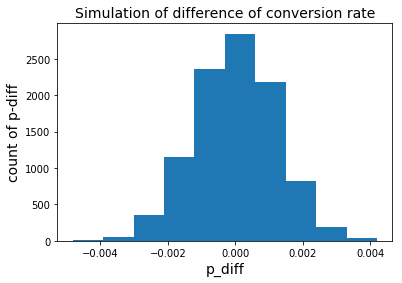

In [89]:
# Convert the p_diff list into array
p_diff=np.array(p_diff)
# Plot the histogram with appropiate labels
plt.hist(p_diff);
plt.title('Simulation of difference of conversion rate',fontsize=14);
plt.xlabel('p_diff',fontsize=14);
plt.ylabel('count of p-diff',fontsize=14);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [90]:
# Calculate the actual difference of conversion rate in the original dataset
obs_new=df[df['group'] == 'treatment']['converted'].mean()
obs_old=df[df['group'] == 'control']['converted'].mean()
obs_diff=obs_new-obs_old
obs_diff

-0.0014795997940775518

In [91]:
# Proportion of p_diff that are greater than the actual difference
(p_diff>obs_diff).mean()

0.88749999999999996

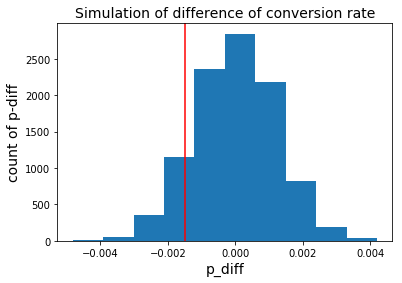

In [92]:
# Plot the actual difference on the graph
plt.hist(p_diff)
plt.axvline(x=obs_diff, color = 'red');
plt.title('Simulation of difference of conversion rate',fontsize=14);
plt.xlabel('p_diff',fontsize=14);
plt.ylabel('count of p-diff',fontsize=14);

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**1. The p_diff is the sampling distribution of the difference in conversion rate between new page and old page. It is determined(calculated) from the 10,000 simulations.  2. The actual difference(obs_diff) is the difference in the conversion rate of new page and old page based on the actual(original) data.   3. The Type I error rate or the alpha is 5%.   4. The p-value is the probability of of obtaining our observed statistic (or one more extreme in favor of the alternative) if the Null Hypothesis is true.   5. The p-value obtained is 89.3%. The higher the p-value the more we move towards the Null Hypothesis.   6. We fail to reject the Null Hypothesis. 7. Conclusion is that the conversion rate of the old page is better than the conversion rate of the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [93]:
import statsmodels.api as sm
# Number of conversions for each group
convert_old = df2.query('landing_page=="old_page" and converted==1').user_id.count()
convert_new = df2.query('landing_page=="new_page" and converted==1').user_id.count()
# Number of individuals for each group
n_old = df2.query('landing_page=="old_page"').user_id.count()
n_new = df2.query('landing_page=="new_page"').user_id.count()
n_old,n_new

(145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [94]:
# Find the z-score and the p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The negative z-score the large p-value suggests that we fail to reject the Null Hypothesis. 
The findings in this section agree with the findings in the section above.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since the response variable is a categoraical variable it is best to apply Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [95]:
# Column for the intercept
df2['intercept']=1
# Coulmns for the dummy group variables
df2['ab_page']=pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [96]:
# Create a Logit model with control group as baseline
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [97]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        20:17:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page column is 0.19 which is different than the p-value calculated in the Part II because the intercept added.¶
The p-value caluclated in this section also points out that we fail to reject the Null Hypothesis.
The logistic regression determines only two possible outcomes. If the new page is equal to the old page or different.
$$H_0: p_{new} - p_{old} = 0$$
$$H_1: p_{new} - p_{old} != 0$$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We can take into considertaion the variable timestamp. It is possible that a particular time of the day say night has more conversion rates than say in the morning. The amount of time spent can also be a factor in the conversion rate**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [98]:
# Read the countries dataset
countries_df=pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [99]:
# Get the names of the countries present in the dataset
countries_df.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [100]:
# Join the two datasets
df2=df2.join(countries_df.set_index('user_id'),on='user_id',how='left',lsuffix='', rsuffix='')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [101]:
# Get the dummy variable column names for the categorical column country.
df2[['CA','UK','US']]=pd.get_dummies(df2['country'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [102]:
# Create the Logit model
country_model=sm.Logit(df2['converted'],df2[['intercept','ab_page','UK','US']])
country_results = country_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [103]:
# Show the results
country_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 15 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        20:17:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

# Limitations

I faced the following limitations during the project:
1. The practical statistics is quite confusing in theory and even more difficult to implement in datasets.
2. There is no way to determine that the output we are getting is correct. I had to double check every line of code.
3. I had to do a lot of research and reading to understand how to implement practical statistics in this project.

# Conclusions

After performing the necessary operations on the given data, the following are the conclusions:
1. The p-value calculated under the null and in the z-score is approximately 90%. This value is larger than the Type I error rate of 5%.
2. The p-value associated with the countries are statiscally insignificant and larger than the Type I error rate. Thus the conversion rate is not dependent on the country a user belongs to.
3. The large p-value infers that the conversion rate of the old page is better than the conversion rate of the new page.
4. We fail to reject the Null Hypothesis.
5. The e-commerce site should not implement the new page as it does not give better results than the old page.

# Acknowledgement

1. https://stackoverflow.com 
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
3. http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0